In [53]:
%load_ext autoreload
%autoreload 0
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import benchmark
import matplotlib.pyplot as plt
import numpy as np

In [55]:
image_path = "./annotations/phase1_averages/images/"
config_file = "annotations/phase1_averages/amman_evaluation_average.yaml"
results = {}

config = benchmark.parse_and_validate_config(config_file)
results_st = benchmark.run_benchmark(config, None, image_path, None, jobs=4, method='student')
results_vc = benchmark.run_benchmark(config, None, image_path, None, jobs=4, method='vote-count')

Running in parallel on 4 processes


100%|██████████| 8/8 [01:07<00:00,  8.47s/it]

Running in parallel on 4 processes



100%|██████████| 8/8 [00:15<00:00,  1.90s/it]


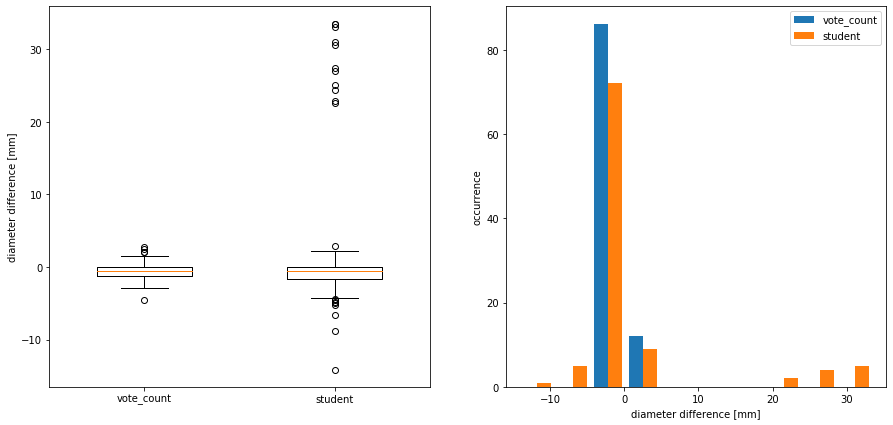

In [56]:
fig, axs = plt.subplots(1,2,figsize=(15,7))

ax = axs[0]
# ax.violinplot(results);
ax.boxplot([results_vc,results_st], labels=["vote_count","student"], widths=[0.5]*2);
ax.set_ylabel("diameter difference [mm]")

ax = axs[1]
ax.hist([results_vc,results_st],label=["vote_count","student"]);
ax.set_xlabel("diameter difference [mm]")
ax.set_ylabel("occurrence");
plt.legend()

In [59]:
print("mean:", np.mean(results_st), "std:", np.std(results_st))

mean: 1.9948979591836735 std: 9.67837240121119


In [61]:
print("mean:", np.mean(results_vc), "std:", np.std(results_vc))

mean: -0.6017611416018739 std: 1.1095611448052085
